# 0. Import Data

In [1]:
import pandas as pd

train_set = pd.read_csv("data/train.csv")
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 1. Data Visualization and Investigation

## 1.1 Investigate Numerical Attributes

### 1.1.1 Investigate "SalePrice"

In [3]:
train_set["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

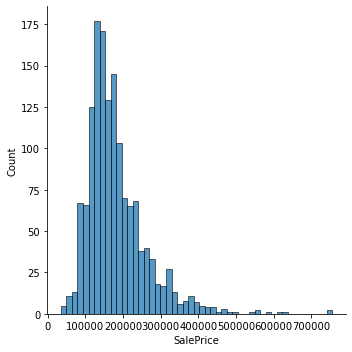

In [4]:
import seaborn as sns
sns.displot(train_set["SalePrice"]);
# left skewed, most models don't do well if not normal distributed

In [5]:
# skewness and kurtosis
print("Skewness: ", train_set["SalePrice"].skew())
print("Kurtosis: ", train_set["SalePrice"].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


### 1.1.2 Investigate Other numerical features

In [6]:
# get all the numerical feature names
numerical_features = [f for f in train_set.columns if train_set.dtypes[f] != "object"]
train_set[numerical_features]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


<AxesSubplot:>

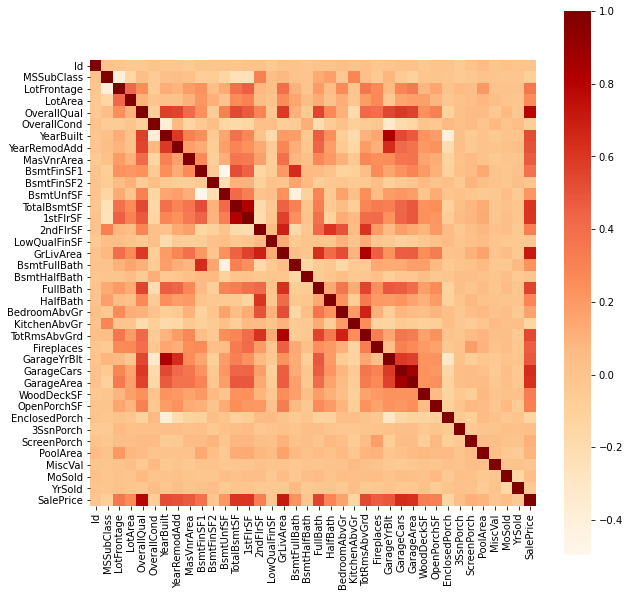

In [7]:
# correlation heatmap
numerical_correlation_matrix = train_set[numerical_features].corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(numerical_correlation_matrix, square=True, cmap="OrRd")

In [8]:
# largest correlation with SalePrice
correlation_with_SalePrice = numerical_correlation_matrix.nlargest(10, "SalePrice")
correlation_with_SalePrice["SalePrice"]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

# 1.2 Investigate Categorical Attributes

### 1.2.1 Investigate "Neighborhood" Feature

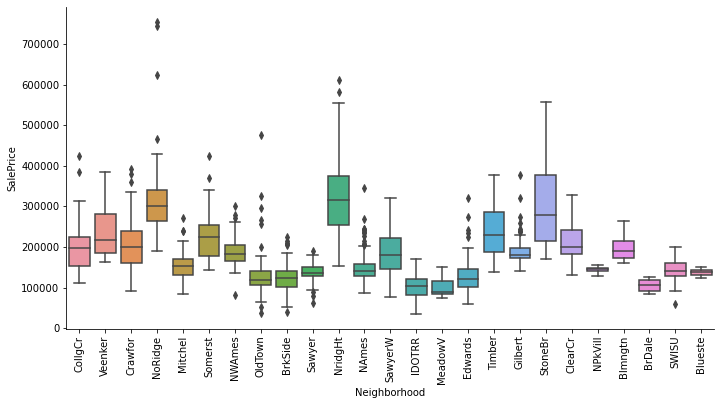

In [9]:
# plot "Neighborhood" feature vs. "SalePrice"
# train_set.plot(kind="scatter", x="Neighborhood", y="SalePrice", rot=90, figsize=(12, 8))

## visualize in scatter plot using plt
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12,8))
# plt.xticks(rotation=90)
# plt.scatter(train_set["Neighborhood"], train_set["SalePrice"])

## visualize in boxplot using sns
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="Neighborhood", y="SalePrice", kind="box", height=5, aspect=2, data=train_set)
plt.xticks(rotation=90);

# apparently average price in some location is hight than others

In [10]:
train_set["Neighborhood"].unique()
# will use one-hot-encoding for this feature

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

### 1.2.2 Investigate Other Categorical Features

In [11]:
# get all categorical features
categorical_features = [f for f in train_set.columns if train_set.dtypes[f] == "object"]
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [12]:
# before we do anything, deal with missing values
train_set[categorical_features].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [13]:
# visualize pandas.melt()
f = pd.melt(train_set, id_vars=["SalePrice"], value_vars=categorical_features)
f

,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL
...,...,...,...
62775,175000,SaleCondition,Normal
62776,210000,SaleCondition,Normal
62777,266500,SaleCondition,Normal
62778,142125,SaleCondition,Normal


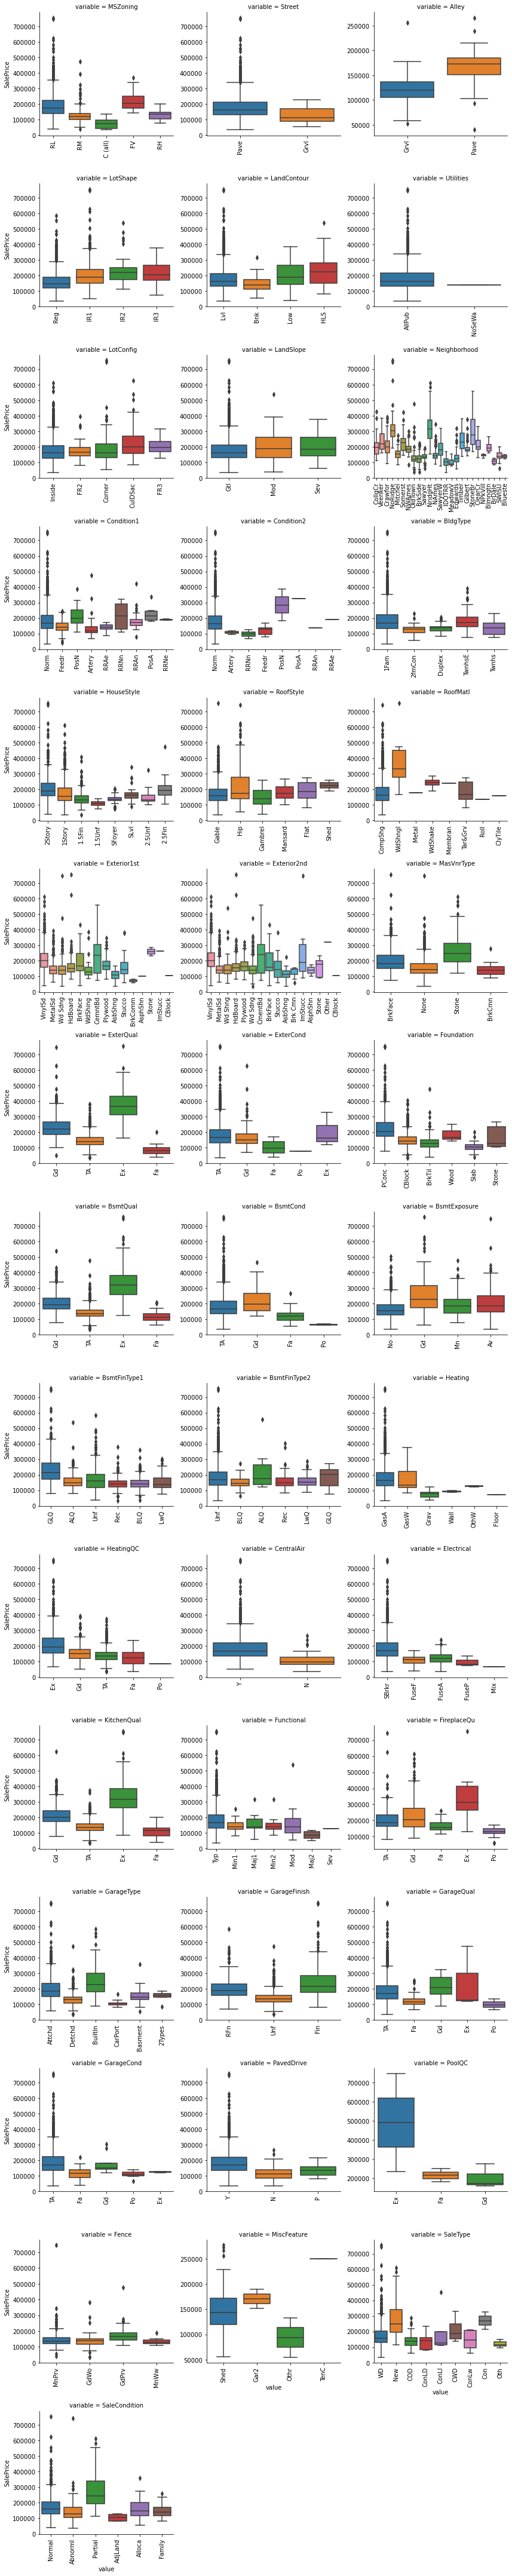

In [14]:
## Show categorical features in boxplots
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)

# pandas.melt() combines desired features together with one pivot column
# in this case, the pivot column is 'SalePrice', all other categorical features
# are stacked into one column as 'variable', and same for their values as 'value'
# print out 'f' to visualize the data frame structure
f = pd.melt(train_set, id_vars=["SalePrice"], value_vars=categorical_features)
# create a seaborn facet grid
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, height=4)
# applying plot function (in this case boxplot()) to each facet's subset of data
g = g.map(boxplot, "value", "SalePrice")

# 2. Data Cleaning and Preparation

## 2.1 Deal with Missing Values

In [15]:
## get test data and combine test set and train set for data cleaning
test_set = pd.read_csv("data/test.csv")
# test_set.shape
full_set = pd.concat([train_set, test_set], sort=False)
full_set.shape

(2919, 81)

In [16]:
# filling missing values for "Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu".
full_set.loc[:, "Alley"] = full_set.loc[:, "Alley"].fillna("None")
full_set.loc[:, "PoolQC"] = full_set.loc[:, "PoolQC"].fillna("None")
full_set.loc[:, "Fence"] = full_set.loc[:, "Fence"].fillna("None")
full_set.loc[:, "MiscFeature"] = full_set.loc[:, "MiscFeature"].fillna("None")
full_set.loc[:, "FireplaceQu"] = full_set.loc[:, "FireplaceQu"].fillna("None")
# filling missing values for "GarageType", "GarageFinish", "GarageQual", "GarageCond"
full_set.loc[:, "GarageType"] = full_set.loc[:, "GarageType"].fillna("None")
full_set.loc[:, "GarageFinish"] = full_set.loc[:, "GarageFinish"].fillna("None")
full_set.loc[:, "GarageQual"] = full_set.loc[:, "GarageQual"].fillna("None")
full_set.loc[:, "GarageCond"] = full_set.loc[:, "GarageCond"].fillna("None")
# filling missing values for "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"
full_set.loc[:, "BsmtQual"] = full_set.loc[:, "BsmtQual"].fillna("None")
full_set.loc[:, "BsmtCond"] = full_set.loc[:, "BsmtCond"].fillna("None")
full_set.loc[:, "BsmtExposure"] = full_set.loc[:, "BsmtExposure"].fillna("None")
full_set.loc[:, "BsmtFinType1"] = full_set.loc[:, "BsmtFinType1"].fillna("None")
full_set.loc[:, "BsmtFinType2"] = full_set.loc[:, "BsmtFinType2"].fillna("None")
# filling missing value for "Electrical", "MasVnrType"
full_set.loc[:, "Electrical"] = full_set.loc[:, "Electrical"].fillna("None")
full_set.loc[:, "MasVnrType"] = full_set.loc[:, "MasVnrType"].fillna("None")
# filling missing values for "MSZoning", "Utilities", "Exterior1st", "Exterior2nd",
# "KitchenQual", "Functional", "SaleType"
full_set.loc[:, "MSZoning"] = full_set.loc[:, "MSZoning"].fillna(full_set["MSZoning"].value_counts().index[0])
full_set.loc[:, "Utilities"] = full_set.loc[:, "Utilities"].fillna(full_set["Utilities"].value_counts().index[0])
full_set.loc[:, "Exterior1st"] = full_set.loc[:, "Exterior1st"].fillna(full_set["Exterior1st"].value_counts().index[0])
full_set.loc[:, "Exterior2nd"] = full_set.loc[:, "Exterior2nd"].fillna(full_set["Exterior2nd"].value_counts().index[0])
full_set.loc[:, "KitchenQual"] = full_set.loc[:, "KitchenQual"].fillna(full_set["KitchenQual"].value_counts().index[0])
full_set.loc[:, "Functional"] = full_set.loc[:, "Functional"].fillna(full_set["Functional"].value_counts().index[0])
full_set.loc[:, "SaleType"] = full_set.loc[:, "SaleType"].fillna(full_set["SaleType"].value_counts().index[0])

## 2.2 Feature Scaling and Transformation Pipelines

In [17]:
full_set_prepared = full_set.drop(["Id", "SalePrice"], axis="columns")
train_y = train_set["SalePrice"]
# train_set.drop(["Id", "SalePrice"], axis="columns", inplace=True)
numerical_features.remove("Id")
numerical_features.remove("SalePrice")

In [18]:
import numpy as np
# log plus 1 transform 'SalePrice', ML models work better if labels are normal distributed
train_y = np.log1p(train_y)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# this pipeline has two transformers.
# SimpleImputer will filling up missing values for numerical features
# StandardScaler will make all values for numerical features in the same range (feature scaling)
numericals_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
])

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
    ("num", numericals_pipeline, numerical_features),
    ("cat", OneHotEncoder(), categorical_features)
])

full_set_prepared = full_pipeline.fit_transform(full_set_prepared)
full_set_prepared

<2919x303 sparse matrix of type '<class 'numpy.float64'>'
	with 230601 stored elements in Compressed Sparse Row format>

In [20]:
# separate train set and test set for ML model training
train_set_prepared = full_set_prepared[:1460]
test_set_prepared = full_set_prepared[1460:]

# 3. Model Training

In [21]:
# function to display RMSE scores
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

## 3.1 Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_regression = LinearRegression()

## Easy way to do, but expose the risk of overfitting
# from sklearn.metrics import mean_squared_error
# linear_regression.fit(train_set_prepared, train_y)
# from sklearn.metrics import mean_squared_error
# lin_reg_predictions = linear_regression.predict(train_set_prepared)
# lin_mse = mean_squared_error(train_y, lin_reg_predictions)
# lin_rmse = np.sqrt(lin_mse)
# lin_rmse

lin_scores = cross_val_score(linear_regression, train_set_prepared, train_y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [0.13558149 0.12378224 0.12209263 0.19392239 0.14486426 0.17888134
 0.12242965 0.09712835 0.26469138 0.14476199]
Mean:  0.1528135715475547
Standard deviation:  0.04595834213398902


## 3.2 Decision Tree Regression Model

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_regression = DecisionTreeRegressor()
tree_scores = cross_val_score(tree_regression, train_set_prepared, train_y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores:  [0.19261247 0.20742934 0.2092492  0.22754044 0.19760539 0.15634169
 0.1962555  0.20370206 0.21869115 0.1832168 ]
Mean:  0.19926440244100815
Standard deviation:  0.01875880204621383


## 3.3 Random Forest Regression Model

In [24]:
from sklearn.ensemble import RandomForestRegressor

forest_regression = RandomForestRegressor()
forest_scores = cross_val_score(forest_regression, train_set_prepared, train_y, scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [0.13889017 0.15496867 0.14491839 0.1287379  0.15261021]
Mean:  0.14402506722453867
Standard deviation:  0.009532361680069315


In [25]:
# another way to train Random Forest model is using GridSearchCV or RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [50, 60, 70], "max_features": [8, 14, 20]},
    {"bootstrap": [False], "n_estimators": [60, 65, 70], "max_features": [12, 14, 16]}
]

grid_search = GridSearchCV(forest_regression, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(train_set_prepared, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [8, 14, 20],
                          'n_estimators': [50, 60, 70]},
                         {'bootstrap': [False], 'max_features': [12, 14, 16],
                          'n_estimators': [60, 65, 70]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [26]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
# evaluation scores
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(np.sqrt(-mean_score), params)
# if hyperparameter search space is large, preferablly to use RandomizedSearchCV

{'bootstrap': False, 'max_features': 16, 'n_estimators': 60}
RandomForestRegressor(bootstrap=False, max_features=16, n_estimators=60)
0.1564409128419394 {'max_features': 8, 'n_estimators': 50}
0.1565244994421637 {'max_features': 8, 'n_estimators': 60}
0.15520826312169708 {'max_features': 8, 'n_estimators': 70}
0.15113110940451774 {'max_features': 14, 'n_estimators': 50}
0.14952223575514667 {'max_features': 14, 'n_estimators': 60}
0.14955807777836727 {'max_features': 14, 'n_estimators': 70}
0.14951022506162995 {'max_features': 20, 'n_estimators': 50}
0.14651779922515829 {'max_features': 20, 'n_estimators': 60}
0.14604120234492804 {'max_features': 20, 'n_estimators': 70}
0.14484873918128754 {'bootstrap': False, 'max_features': 12, 'n_estimators': 60}
0.14855662248540297 {'bootstrap': False, 'max_features': 12, 'n_estimators': 65}
0.1458064824904162 {'bootstrap': False, 'max_features': 12, 'n_estimators': 70}
0.1464070606958344 {'bootstrap': False, 'max_features': 14, 'n_estimators': 60}


## 3.4 Ridge Regression Model

In [27]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

ridge = RidgeCV(cv=10)
ridge.fit(train_set_prepared, train_y)

ridge_predictions = ridge.predict(train_set_prepared)
ridge_mse = mean_squared_error(train_y, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

0.11147898192020204

## 3.5 ElasticNet Regression Model

In [28]:
from sklearn.linear_model import ElasticNetCV

elastic = ElasticNetCV(l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1], 
                       alphas=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1], 
                       max_iter=5000, cv=10)
elastic.fit(train_set_prepared, train_y)

elastic_predictions = elastic.predict(train_set_prepared)
elastic_mse = mean_squared_error(train_y, elastic_predictions)
elastic_rmse = np.sqrt(elastic_mse)
elastic_rmse

0.1057310623321589

## 3.6 Lasso Regression Model

In [29]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1], 
                max_iter=5000, cv=10)
lasso.fit(train_set_prepared, train_y)

lasso_predictions = lasso.predict(train_set_prepared)
lasso_mse = mean_squared_error(train_y, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

0.10747129313489898

## 3.7 Combine Models

In [30]:
def combinedModels(X, y=None):
    if y is not None:
        linear_regression.fit(X, y)
        # tree_regression.fit(X, y)
        forest_regression.fit(X, y)
        ridge.fit(X, y)
        elastic.fit(X, y)
        lasso.fit(X, y)
        return ((0.1 * linear_regression.predict(X)) + \
               (0.2 * forest_regression.predict(X)) + \
               (0.2 * ridge.predict(X)) + \
               (0.3 * elastic.predict(X)) + \
               (0.2 * lasso.predict(X)))
    else:
        return ((0.1 * linear_regression.predict(X)) + \
               (0.2 * forest_regression.predict(X)) + \
               (0.2 * ridge.predict(X)) + \
               (0.3 * elastic.predict(X)) + \
               (0.2 * lasso.predict(X)))

combined_predictions = combinedModels(train_set_prepared, train_y)
combined_predictions_mse = mean_squared_error(train_y, combined_predictions)
combined_predictions_rmse = np.sqrt(combined_predictions_mse)
combined_predictions_rmse

0.0913062905332794

# 4. Make Predictions on Test Data

In [31]:
test_set_predictions = combinedModels(test_set_prepared)
test_set_predictions_norm = np.expm1(test_set_predictions)
test_set_predictions_norm

array([119379.96963316, 151147.42797406, 174091.30990059, ...,
       163258.94579037, 114379.56949992, 228183.53507518])

# 5. Submit the Predictions

In [35]:
my_submission = pd.DataFrame({"Id": np.arange(1461, 2920), "SalePrice": test_set_predictions_norm})
my_submission.to_csv("submission.csv", index=False)
my_submission

,Id,SalePrice
0,1461,119379.969633
1,1462,151147.427974
2,1463,174091.309901
3,1464,194780.644702
4,1465,196132.678817
...,...,...
1454,2915,84828.065982
1455,2916,85027.214035
1456,2917,163258.945790
1457,2918,114379.569500


# Summary

```
More focused on data cleaning and preparation
Is able to lower the RMSE to 0.09 (in v0, RMSE is 0.2)
What can be improved:
    dealing with outliers
    remove irrelevant features, combine similar features
    do a better job on dealing with missing values
    use more advanced ML models
```